In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

## Glimpse Data

Read data

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
btc = pd.read_csv('/content/gdrive/MyDrive/research/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
# Converting the Timestamp column from string to datetime
btc['Timestamp'] = [datetime.fromtimestamp(x) for x in btc['Timestamp']]
btc = btc.set_index('Timestamp')

#### Time resampling

In [5]:
btc_daily = btc.resample("24H").mean() #daily resampling

In [7]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    print(df.head())
    print(df.isnull().sum())
    
fill_missing(btc_daily)

                Open      High  ...  Volume_(Currency)  Weighted_Price
Timestamp                       ...                                   
2011-12-31  4.465000  4.482500  ...         106.330084        4.471603
2012-01-01  4.806667  4.806667  ...          35.259720        4.806667
2012-01-02  5.000000  5.000000  ...          95.240000        5.000000
2012-01-03  5.252500  5.252500  ...          58.100651        5.252500
2012-01-04  5.200000  5.223333  ...          63.119577        5.208159

[5 rows x 7 columns]
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


#### Plot time series

[]

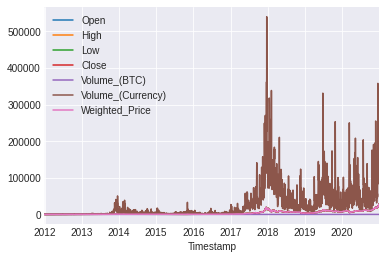

In [10]:
btc_daily.plot()
plt.plot()